<a href="https://colab.research.google.com/github/crimama/Bigdata_course/blob/Bigdata_course/21_12_22_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 딥러닝 기초 모형 

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

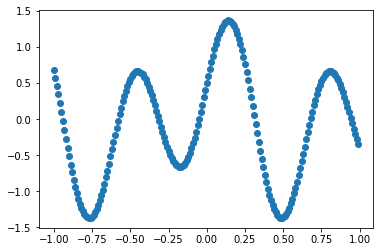

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = np.sin(10*x) + 0.5 * np.cos(5*x)

plt.scatter(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
#데이터 분할 , 믹싱 X 
index = int(len(x)*0.8)
train_x, test_x = x[:index],x[index:]
train_y, test_y = y[:index],y[index:]

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense,Input
import time

time : 31.233101844787598


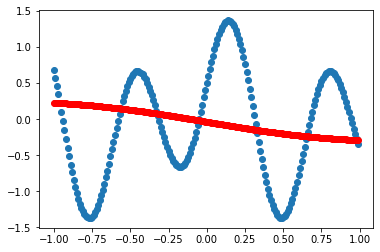

In [ ]:
#모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(1))

model.compile(optimizer = 'AdaDelta',loss = 'mse')

start_time = time.time()

hist = model.fit(x,y,epochs=1000,verbose=0,batch_size =20, validation_split = 0.1)
print(f'time : {time.time()-start_time}')

#예측
y_ = model.predict(x)

#결과 그래프 
plt.scatter(x,y)
plt.scatter(x,y_,color ='r')
plt.show()




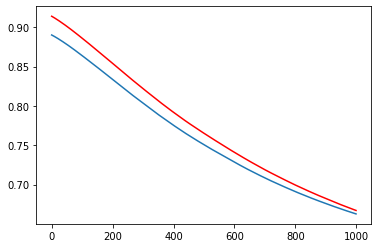

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],color='r')

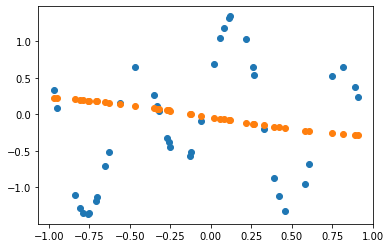

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_)
plt.show()

# iris 데이터로 실습 

## 데이터 다운로드 

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv

--2021-12-22 01:24:12--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.66K  --.-KB/s    in 0s      

2021-12-22 01:24:12 (64.0 MB/s) - ‘iris.csv’ saved [2720/2720]



In [ ]:
import pandas as pd
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
df.isnull().sum()

septal_length    0
septal_width     0
petal_length     0
petal_width      0
setosa           0
versicolor       0
virginica        0
dtype: int64

- 들어가는 변수의 갯수는 4개 -> input 이 4개
- 결과는 setosa, versicolor, virginica각각 계산 값이 나오는데 가장 큰 값을 갖는 것의 분류가 됨 

## 데이터 정제

In [ ]:
#넘파이로 변경 
df = np.array(df)

In [ ]:
#x, y분할 
x = df[:,:4]
y = df[:,4:]

In [ ]:
#테스트 데이터 80로 분할 
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,test_y = train_test_split(x,y,random_state=42,train_size=0.8)

In [ ]:
#모양 확인 
print(train_x.shape,train_y.shape)

(96, 4) (96, 3)


## 모델 구축 

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input 

In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(10,activation = 'tanh'))
model.add(Dense(3,activation = 'softmax')) #softmax는 출력층에서만 사용 됨 -> 내용 확인 다시 필요 

#이건 분류 문제
#깃발을 얼마나 높이 들었냐가 문제가 아닌, 누가 가장 높게 들었냐가 중요
#값의 크기 보다는 아웃풋 세개 간의 우위가 더 중요 -> 이 우위를 통해 분류가 되기 때문에
#그래서 crossentropy를 loss로 사용 -> 분류문제에서는 필수 
#metrics 도 mae 대신 accuracy 사용 
#keras가 이 모델이 분류 문제임을 알수 있게 해주는 것이 loss에 들어가는 categorical_ <- 이거 
#categorical_crossentropy 이거의 뜻은 분류문제 인데 loss의 기준을 crossentropy로 사용 
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

model.fit(train_x,train_y, epochs =200, verbose =0) #batch_size 를 넣지 않으면 default 값이 들어감 default 는 32 

loss,acc = model.evaluate(test_x,test_y)

1/1 [==============================] - 0s 113ms/step - loss: 0.2288 - accuracy: 0.9167


In [ ]:
y_ = model.predict(test_x)
print(y_) 
print(np.argmax(y_,axis=1)) #argmax -> 최대값의 인덱스  

[[9.66400564e-01 3.34634632e-02 1.35906361e-04]
 [9.20012535e-05 1.51323434e-02 9.84775722e-01]
 [9.72486913e-01 2.74024848e-02 1.10600326e-04]
 [6.59652427e-03 4.00053352e-01 5.93350172e-01]
 [6.61934912e-02 9.02378380e-01 3.14280950e-02]
 [5.94646251e-03 3.61239463e-01 6.32814109e-01]
 [2.62961112e-04 3.54757309e-02 9.64261353e-01]
 [4.61229570e-02 8.91934454e-01 6.19425476e-02]
 [1.80909550e-03 1.60705358e-01 8.37485552e-01]
 [9.72191095e-01 2.76968330e-02 1.12033682e-04]
 [7.72776490e-04 8.43858570e-02 9.14841413e-01]
 [7.69509992e-04 8.22396427e-02 9.16990876e-01]
 [3.31415534e-02 8.59118462e-01 1.07739955e-01]
 [4.12665121e-03 2.92304456e-01 7.03568876e-01]
 [9.71717536e-01 2.81697791e-02 1.12652524e-04]
 [2.99318004e-02 8.32826912e-01 1.37241274e-01]
 [9.66287136e-01 3.35775316e-02 1.35372378e-04]
 [2.13175008e-04 3.04207169e-02 9.69366074e-01]
 [1.66221394e-03 1.48178637e-01 8.50159168e-01]
 [9.66605127e-01 3.32608782e-02 1.33981142e-04]
 [2.94319238e-04 3.82916331e-02 9.614140

**문제점**
- 컬럼 별로 분류 해서 0과 1로 해당 카테고리 여부를 표현하는 것을 원핫 인코딩이라고 함 
- 하지만 종류가 많아질 수록 컬럼 수가 많아지는 것이 문제가 있음 
- 그래서 이걸 category 컬럼으로 모으고 index로 카테고리 분류하는 것이 더 효율적 

# 카테고리 인덱스 모델 
- 원핫인코딩 대안 

## 데이터 다시 불러오기

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv

--2021-12-22 02:12:05--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-12-22 02:12:05 (50.0 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [ ]:
df = pd.read_csv('/content/iris_with_category_index.csv')
df.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


## 데이터 정제

In [ ]:
df = np.array(df)
x = df[:,:4]
y = df[:,4:]

In [ ]:
print(x.shape,y.shape)

(120, 4) (120, 1)


In [ ]:
#테스트 데이터 80로 분할 
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,test_y = train_test_split(x,y,random_state=42,train_size=0.8)

## 모델 구축

In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

#이런 식으로 원핫인코딩이 아닌 카테고리 인덱싱으로 분류를 할 경우 loss 에 sparse를 추가 해야 함 
#그러면 keras 가 알아서 다 해줌 
# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                50        
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 92ms/step - loss: 0.2114 - accuracy: 0.9167
loss= 0.2114352136850357
acc= 0.9166666865348816


In [ ]:
y_ = model.predict(test_x)
print(y_) 
print(np.argmax(y_,axis=1)) #argmax -> 최대값의 인덱스 

[[9.94526207e-01 5.20768575e-03 2.66020827e-04]
 [1.72901549e-04 7.03412443e-02 9.29485857e-01]
 [9.96349216e-01 3.42168263e-03 2.29166297e-04]
 [1.25015317e-03 4.94451612e-01 5.04298270e-01]
 [5.42628160e-03 9.91857052e-01 2.71663722e-03]
 [1.18024938e-03 4.62171078e-01 5.36648691e-01]
 [2.36874199e-04 9.74964350e-02 9.02266681e-01]
 [3.77160823e-03 9.79183793e-01 1.70446038e-02]
 [1.12593744e-03 4.73361731e-01 5.25512338e-01]
 [9.96317983e-01 3.44985304e-03 2.32189632e-04]
 [2.99827050e-04 1.21119753e-01 8.78580391e-01]
 [3.25147732e-04 1.32200196e-01 8.67474616e-01]
 [3.68514727e-03 9.90068734e-01 6.24617003e-03]
 [9.93807917e-04 4.00307089e-01 5.98699093e-01]
 [9.96458113e-01 3.31144664e-03 2.30433783e-04]
 [3.19178426e-03 9.82745588e-01 1.40626272e-02]
 [9.94718909e-01 5.02324104e-03 2.57767941e-04]
 [2.02474621e-04 8.20898190e-02 9.17707682e-01]
 [5.17219538e-04 2.14021102e-01 7.85461664e-01]
 [9.95314240e-01 4.42571752e-03 2.60050700e-04]
 [2.49525532e-04 1.03303574e-01 8.964469

# 영화 관객 수 예측
-https://dacon.io/competitions/open/235536/data

## 데이터 호출 

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [180]:
df = pd.read_csv('/content/drive/MyDrive/데이터 보관/영화 관객수/movies_train.csv')
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


**변수 별 처리**
- title : 자연어 처리 못하기 때문에 제외 
- 배급사, 장르 : 카테고리로 사용 
- 날짜 : 우선 제외 
- 시간 : 30~1시간, 1~1.5, 1.5~2, 2시간 이상 이정도로 카테고리 분류 (우선 제외) 
- 연령 : 카테고리화 
- 감독 : 
- dir_prev_bfun : 감독의 전작 평균 관객수 (스케일이 너무 크므로 로그스케일 사용) 

**예측 목적**
- 영화 관객 수 예측 
 

## 데이터 전처리
- 컬럼 제거 
- 결측치 처리 
- 카테고리화 
- log스케일 변환 
- 불필요한 컬럼 제거 
- 원핫인코딩
- 넘파이 변환
- xy나누기 
- train,test 분할 

**1. 컬럼 제거** 

In [97]:
#1. 컬럼 제거 
df = df.drop(columns = ['title','release_time','director'])

**2. 결측치 처리** 

In [98]:
#2. 결측치 처리 
df.fillna(0,inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   time            600 non-null    int64  
 3   screening_rat   600 non-null    object 
 4   dir_prev_bfnum  600 non-null    float64
 5   dir_prev_num    600 non-null    int64  
 6   num_staff       600 non-null    int64  
 7   num_actor       600 non-null    int64  
 8   box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 42.3+ KB


**3. 카테고리 컬럼 인코딩**

distributor

In [100]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

genre

In [101]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

screening_rat

In [102]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [103]:
df.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0.00,0,91,2,23398,80,10,3
1,(주)쇼박스,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3
2,(주)쇼박스,액션,123,15세 관람가,220775.25,4,343,4,6959083,21,10,1
3,(주)NEW,코미디,101,전체 관람가,23894.00,2,20,6,217866,6,11,2
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1.00,1,251,2,483387,96,11,1


4. 로그 스케일 변환 
- dir_prev_bfun
- num_staff
- box_off_num

- log변환할 때 0인 값은 변환이 안되므로 np.log 대신 np.log1p 사용 
- np.log1p -> 0인 값을 1로 채워 준 뒤 log로 연산 

In [104]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [105]:
df.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code,dir_prev_bfnum_log,num_staff_log,box_off_num_log
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0.00,0,91,2,23398,80,10,3,0.000000,4.521789,10.060449
1,(주)쇼박스,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,21,2,3,13.965312,5.961005,15.771725
2,(주)쇼박스,액션,123,15세 관람가,220775.25,4,343,4,6959083,21,10,1,12.304905,5.840642,15.755558
3,(주)NEW,코미디,101,전체 관람가,23894.00,2,20,6,217866,6,11,2,10.081425,3.044522,12.291640
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1.00,1,251,2,483387,96,11,1,0.693147,5.529429,13.088575


**5. 원핫인코딩**
- distributor_code	
- genre_code	
- screening_rat_code

In [106]:
df = pd.get_dummies(df,columns = ['distributor_code','genre_code','screening_rat_code'])

In [107]:
 df.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,...,distributor_code_145,distributor_code_146,distributor_code_147,distributor_code_148,distributor_code_149,distributor_code_150,distributor_code_151,distributor_code_152,distributor_code_153,distributor_code_154,distributor_code_155,distributor_code_156,distributor_code_157,distributor_code_158,distributor_code_159,distributor_code_160,distributor_code_161,distributor_code_162,distributor_code_163,distributor_code_164,distributor_code_165,distributor_code_166,distributor_code_167,distributor_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0.00,0,91,2,23398,0.000000,4.521789,10.060449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,(주)쇼박스,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,13.965312,5.961005,15.771725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,(주)쇼박스,액션,123,15세 관람가,220775.25,4,343,4,6959083,12.304905,5.840642,15.755558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,(주)NEW,코미디,101,전체 관람가,23894.00,2,20,6,217866,10.081425,3.044522,12.291640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1.00,1,251,2,483387,0.693147,5.529429,13.088575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


**6.불필요한 컬럼 제거**
0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   time            600 non-null    int64  
 3   screening_rat   600 non-null    object 
 4   dir_prev_bfnum  600 non-null    float64
 5   dir_prev_num    600 non-null    int64  
 6   num_staff       600 non-null    int64  
 7   num_actor       600 non-null    int64  
 8   box_off_num     600 non-null    int64 

In [108]:
df.drop(columns = ['distributor','genre','time','screening_rat','dir_prev_bfnum','num_staff'],inplace = True)

In [109]:
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,distributor_code_29,distributor_code_30,distributor_code_31,distributor_code_32,distributor_code_33,...,distributor_code_145,distributor_code_146,distributor_code_147,distributor_code_148,distributor_code_149,distributor_code_150,distributor_code_151,distributor_code_152,distributor_code_153,distributor_code_154,distributor_code_155,distributor_code_156,distributor_code_157,distributor_code_158,distributor_code_159,distributor_code_160,distributor_code_161,distributor_code_162,distributor_code_163,distributor_code_164,distributor_code_165,distributor_code_166,distributor_code_167,distributor_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,0,2,23398,0.000000,4.521789,10.060449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,3,7072501,13.965312,5.961005,15.771725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,4,6959083,12.304905,5.840642,15.755558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,2,6,217866,10.081425,3.044522,12.291640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,2,483387,0.693147,5.529429,13.088575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


**7. x,y분할**

In [110]:
x = df.drop(columns = ['box_off_num','box_off_num_log'])
y = df['box_off_num_log']

**8. 넘파이 변환**

In [111]:
x = np.array(x)
y = np.array(y).reshape(-1,1)

**9. train, test분할**

In [70]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,train_size = 0.8,random_state=42)

**10. 정규화**
- 카테고리는 정규화 하면 안됨 

In [43]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(train_x)
scaled_train_x = scale.fit_transform(train_x)
scaled_test_x = scale.fit_transform(test_x)

## 모델 구축

In [19]:
train_x.shape

(480, 189)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                1900      
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


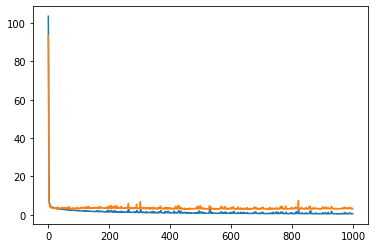

4/4 [==============================] - 0s 5ms/step - loss: 4.7615 - mape: 25.0521 - root_mean_squared_error: 2.1821
rmse= 2.1820762157440186
loss= 4.761456489562988
mape= 25.052059173583984


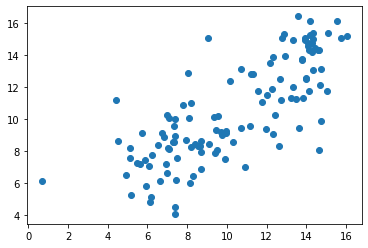

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(189,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape",RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape ,
rmse = model.evaluate(test_x, test_y)
print('rmse=', rmse)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [93]:
y_ = model.predict(test_x)

predicted = np.exp(y_)
rmse = RootMeanSquaredError()
result_rmse = rmse(predicted,test_y)
print(result_rmse)

tf.Tensor(2249471.5, shape=(), dtype=float32)


In [94]:
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,distributor_code_29,distributor_code_30,distributor_code_31,distributor_code_32,distributor_code_33,...,distributor_code_145,distributor_code_146,distributor_code_147,distributor_code_148,distributor_code_149,distributor_code_150,distributor_code_151,distributor_code_152,distributor_code_153,distributor_code_154,distributor_code_155,distributor_code_156,distributor_code_157,distributor_code_158,distributor_code_159,distributor_code_160,distributor_code_161,distributor_code_162,distributor_code_163,distributor_code_164,distributor_code_165,distributor_code_166,distributor_code_167,distributor_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,-0.740798,-0.697484,23398,-0.848308,0.276855,10.060449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.949235,-0.288802,7072501,1.384512,1.081104,15.771725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2.639268,0.119880,6959083,1.119041,1.013843,15.755558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0.949235,0.937244,217866,0.763543,-0.548656,12.291640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.104219,-0.697484,483387,-0.737486,0.839935,13.088575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


## 정규화 케이스 
- dir_perv_num 
- num_actor
_ dir_prev_bfnum_log
- num_staff_log
- box_off_num_log

In [112]:
df.head()

,dir_prev_num,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,distributor_code_28,distributor_code_29,distributor_code_30,distributor_code_31,distributor_code_32,distributor_code_33,...,distributor_code_145,distributor_code_146,distributor_code_147,distributor_code_148,distributor_code_149,distributor_code_150,distributor_code_151,distributor_code_152,distributor_code_153,distributor_code_154,distributor_code_155,distributor_code_156,distributor_code_157,distributor_code_158,distributor_code_159,distributor_code_160,distributor_code_161,distributor_code_162,distributor_code_163,distributor_code_164,distributor_code_165,distributor_code_166,distributor_code_167,distributor_code_168,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,0,2,23398,0.000000,4.521789,10.060449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,2,3,7072501,13.965312,5.961005,15.771725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,4,6959083,12.304905,5.840642,15.755558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,2,6,217866,10.081425,3.044522,12.291640,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,1,2,483387,0.693147,5.529429,13.088575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [113]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean())/df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean())/df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean())/df.dir_prev_bfnum_log.std()
df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean())/df.num_staff_log.std()


In [114]:
x = df.drop(columns = ['box_off_num','box_off_num_log'])
y = df['box_off_num_log']
x = np.array(x)
y = np.array(y).reshape(-1,1)

In [115]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,train_size = 0.8,random_state=42)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 10)                1900      
                                                                 
 dense_43 (Dense)            (None, 10)                110       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


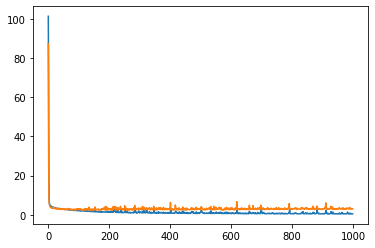

4/4 [==============================] - 0s 4ms/step - loss: 4.4296 - mape: 24.3321 - root_mean_squared_error: 2.1047
loss= 4.429612636566162
mape= 24.33214569091797
rmse= 2.1046645641326904


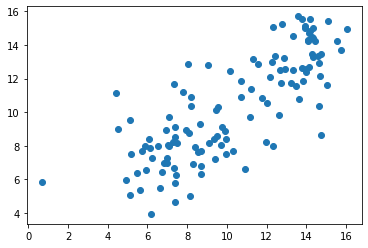

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(189,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape",RootMeanSquaredError()])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape ,rmse = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)
print('rmse=',rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

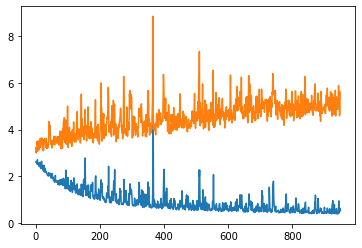

In [81]:
plt.plot(history.history['loss'][50:])
plt.plot(history.history['val_loss'][50:])
plt.show()

In [118]:
y_ = model.predict(test_x)

predicted = np.exp(y_)
test_y_ = np.exp(test_y)
rmse = RootMeanSquaredError()
result_rmse = rmse(predicted,test_y_)
print(result_rmse)

tf.Tensor(1449550.9, shape=(), dtype=float32)


## test데이터 예측
- 테스트 데이터를 적용할 때 train 데이터에 적용한 전처리와 똑같이 적용 해야 함  

In [203]:
train_df = pd.read_csv('/content/drive/MyDrive/데이터 보관/영화 관객수/movies_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이터 보관/영화 관객수/movies_test.csv')

In [204]:
#더미 y 컬럼 추가 
test_df['box_off_num']=0

In [187]:
print(len(train_df),len(test_df))

600 243


In [205]:
df = pd.concat([train_df,test_df],axis=0)

**1. 컬럼 제거** 

In [206]:
#1. 컬럼 제거 
df = df.drop(columns = ['title','release_time','director'])

**2. 결측치 처리** 

In [207]:
#2. 결측치 처리 
df.fillna(0,inplace=True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     843 non-null    object 
 1   genre           843 non-null    object 
 2   time            843 non-null    int64  
 3   screening_rat   843 non-null    object 
 4   dir_prev_bfnum  843 non-null    float64
 5   dir_prev_num    843 non-null    int64  
 6   num_staff       843 non-null    int64  
 7   num_actor       843 non-null    int64  
 8   box_off_num     843 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 65.9+ KB


**3. 카테고리 컬럼 인코딩**

distributor

In [209]:
df.distributor = df.distributor.astype('category')
df['distributor_code'] = df.distributor.cat.codes

genre

In [210]:
df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

screening_rat

In [211]:
df.screening_rat = df.screening_rat.astype('category')
df['screening_rat_code'] = df.screening_rat.cat.codes

In [212]:
df.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0.00,0,91,2,23398,97,10,3
1,(주)쇼박스,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,27,2,3
2,(주)쇼박스,액션,123,15세 관람가,220775.25,4,343,4,6959083,27,10,1
3,(주)NEW,코미디,101,전체 관람가,23894.00,2,20,6,217866,7,11,2
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1.00,1,251,2,483387,122,11,1


4. 로그 스케일 변환 
- dir_prev_bfun
- num_staff
- box_off_num

- log변환할 때 0인 값은 변환이 안되므로 np.log 대신 np.log1p 사용 
- np.log1p -> 0인 값을 1로 채워 준 뒤 log로 연산 

In [213]:
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [214]:
df.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_code,genre_code,screening_rat_code,dir_prev_bfnum_log,num_staff_log,box_off_num_log
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0.00,0,91,2,23398,97,10,3,0.000000,4.521789,10.060449
1,(주)쇼박스,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,27,2,3,13.965312,5.961005,15.771725
2,(주)쇼박스,액션,123,15세 관람가,220775.25,4,343,4,6959083,27,10,1,12.304905,5.840642,15.755558
3,(주)NEW,코미디,101,전체 관람가,23894.00,2,20,6,217866,7,11,2,10.081425,3.044522,12.291640
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1.00,1,251,2,483387,122,11,1,0.693147,5.529429,13.088575


**5. 원핫인코딩**
- distributor_code	
- genre_code	
- screening_rat_code

In [215]:
df = pd.get_dummies(df,columns = ['distributor_code','genre_code','screening_rat_code'])

In [216]:
 df.head()

,distributor,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dir_prev_bfnum_log,num_staff_log,box_off_num_log,distributor_code_0,distributor_code_1,distributor_code_2,distributor_code_3,distributor_code_4,distributor_code_5,distributor_code_6,distributor_code_7,distributor_code_8,distributor_code_9,distributor_code_10,distributor_code_11,distributor_code_12,distributor_code_13,distributor_code_14,distributor_code_15,distributor_code_16,distributor_code_17,distributor_code_18,distributor_code_19,distributor_code_20,distributor_code_21,distributor_code_22,distributor_code_23,distributor_code_24,distributor_code_25,distributor_code_26,distributor_code_27,...,distributor_code_180,distributor_code_181,distributor_code_182,distributor_code_183,distributor_code_184,distributor_code_185,distributor_code_186,distributor_code_187,distributor_code_188,distributor_code_189,distributor_code_190,distributor_code_191,distributor_code_192,distributor_code_193,distributor_code_194,distributor_code_195,distributor_code_196,distributor_code_197,distributor_code_198,distributor_code_199,distributor_code_200,distributor_code_201,distributor_code_202,distributor_code_203,genre_code_0,genre_code_1,genre_code_2,genre_code_3,genre_code_4,genre_code_5,genre_code_6,genre_code_7,genre_code_8,genre_code_9,genre_code_10,genre_code_11,screening_rat_code_0,screening_rat_code_1,screening_rat_code_2,screening_rat_code_3
0,롯데엔터테인먼트,액션,96,청소년 관람불가,0.00,0,91,2,23398,0.000000,4.521789,10.060449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,(주)쇼박스,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,13.965312,5.961005,15.771725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,(주)쇼박스,액션,123,15세 관람가,220775.25,4,343,4,6959083,12.304905,5.840642,15.755558,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,(주)NEW,코미디,101,전체 관람가,23894.00,2,20,6,217866,10.081425,3.044522,12.291640,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,쇼박스(주)미디어플렉스,코미디,108,15세 관람가,1.00,1,251,2,483387,0.693147,5.529429,13.088575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


**6.불필요한 컬럼 제거**

In [217]:
df.drop(columns = ['distributor','genre','time','screening_rat','dir_prev_bfnum','num_staff'],inplace = True)

**10. 정규화**
- 카테고리는 정규화 하면 안됨 

In [218]:
df['dir_prev_num'] = df.dir_prev_num.astype(np.float)
df['num_actor'] = df.num_actor.astype(np.float)

df['dir_prev_num'] = (df.dir_prev_num - df.dir_prev_num.mean())/df.dir_prev_num.std()
df['num_actor'] = (df.num_actor - df.num_actor.mean())/df.num_actor.std()
df['dir_prev_bfnum_log'] = (df.dir_prev_bfnum_log - df.dir_prev_bfnum_log.mean())/df.dir_prev_bfnum_log.std()
df['num_staff_log'] = (df.num_staff_log - df.num_staff_log.mean())/df.num_staff_log.std()

In [219]:
# x,y 데이터 분할 
x = df.drop(columns = ['box_off_num','box_off_num_log'])
y = df['box_off_num_log']
x = np.array(x)
y = np.array(y).reshape(-1,1)

In [236]:
# 트레인, 테스트 df 분할 
# train = 600, test = 243 
print(x[:600,:].shape,x[600:,:].shape)
train_df = x[:600,:]
test_df = x[600:,:]
train_df_y = y[:600,:]
test_df_y = y[600:,:]
train_df_y = train_df_y.reshape(-1,1).shape

(600, 224) (243, 224)


### 모델 구축 

In [240]:
# 데이터 분할 
from sklearn.model_selection import train_test_split

split_train_x,split_test_x,split_train_y,split_test_y = train_test_split(train_df,train_df_y,train_size = 0.8,random_state=42)

In [241]:
split_train_x

(480, 224)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                2250      
                                                                 
 dense_58 (Dense)            (None, 10)                110       
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


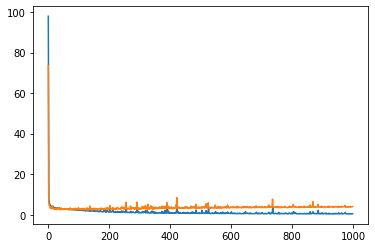

4/4 [==============================] - 0s 4ms/step - loss: 5.2774 - mape: 25.2744 - root_mean_squared_error: 2.2973
rmse= 2.297258138656616
loss= 5.277394771575928
mape= 25.274375915527344


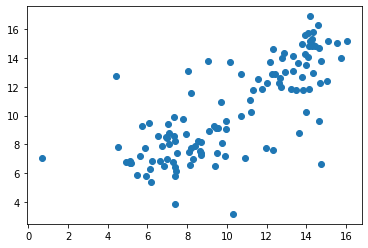

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(224,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape",RootMeanSquaredError()])
model.summary()

history = model.fit(split_train_x, split_train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape ,rmse = model.evaluate(split_test_x, split_test_y)
print('rmse=', rmse)
print("loss=", loss)
print("mape=", mape)

y_ = model.predict(split_test_x)

plt.scatter(split_test_y, y_)
plt.show()

In [252]:
predicted_test_df_y = model.predict(test_df)

In [256]:
test_df.shape

(243, 224)

In [257]:
y_ = model.predict(split_test_x)

predicted = np.exp(y_)
rmse = RootMeanSquaredError()
result_rmse = rmse(predicted,split_test_y)
print(result_rmse)

tf.Tensor(2708755.2, shape=(), dtype=float32)


In [253]:
np.exp(predicted_test_df_y)

array([[6.34899062e+05],
       [4.45039562e+05],
       [8.53044188e+05],
       [3.89718850e+06],
       [8.29719750e+05],
       [4.86402783e+03],
       [1.20621594e+03],
       [6.73251367e+03],
       [1.55891768e+04],
       [1.18253836e+05],
       [2.33219750e+05],
       [1.07610212e+06],
       [7.89562031e+04],
       [5.84964722e+02],
       [1.15492188e+06],
       [2.84162625e+06],
       [1.12148242e+03],
       [5.46671133e+04],
       [8.67513203e+04],
       [3.68177617e+04],
       [1.88718094e+02],
       [9.33114319e+02],
       [5.85187383e+04],
       [4.23726997e+01],
       [8.74755127e+02],
       [1.12874550e+07],
       [6.41203564e+03],
       [1.85799656e+05],
       [6.84334424e+03],
       [1.11646898e+05],
       [1.53619062e+05],
       [3.77313843e+03],
       [1.86423248e+02],
       [3.24556250e+05],
       [5.83489929e+02],
       [2.93959937e+03],
       [2.64714630e+02],
       [4.79838440e+02],
       [6.58681519e+02],
       [3.45954010e+02],
